In [41]:
import pandas as pd
import matplotlib.pyplot as plt
print(plt.style.available)
plt.style.use('seaborn-v0_8') # sesuaikan dengan tema yang diinginkan

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


# Tentang Kiva

<img src="assets/kiva.jpg" width="500"/>

[Kiva.org](https://www.kiva.org/) adalah sebuah platform online non-profit untuk crowdfunding yang memungkinkan individu dapat meminjam dana untuk keperluan bisnis. Misinya adalah untuk meningkatkan kesejahteraan warga marginal (terutama low-income entrepreneurs and students) di beberapa negara. Crowdfunding (urun dana) adalah aktivitas pengumpulan dana modal dari beberapa individu untuk membiayai usaha bisnis baru.

**Role play:** Anda dan tim adalah seorang data analyst di organisasi Kiva ini.

# Data Preparation

Pertama, load file `loan_kiva.csv` pada folder `data_input`:

In [42]:
kiva = pd.read_csv('data_input/loan_kiva.csv')
kiva.head()

,id,funded_amount,loan_amount,activity,sector,country,region,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval
0,653051,300.0,300.0,Fruits & Vegetables,Food,Pakistan,Lahore,247,2014-01-01 06:12:39,2014-01-02 10:06:32,12,12,irregular
1,653053,575.0,575.0,Rickshaw,Transportation,Pakistan,Lahore,247,2014-01-01 06:51:08,2014-01-02 09:17:23,11,14,irregular
2,653068,150.0,150.0,Transportation,Transportation,India,Maynaguri,334,2014-01-01 09:58:07,2014-01-01 16:01:36,43,6,bullet
3,653063,200.0,200.0,Embroidery,Arts,Pakistan,Lahore,247,2014-01-01 08:03:11,2014-01-01 13:00:00,11,8,irregular
4,653084,400.0,400.0,Milk Sales,Food,Pakistan,Abdul Hakeem,245,2014-01-01 11:53:19,2014-01-01 19:18:51,14,16,monthly


Berikut adalah deskripsi dari masing-masing kolom:
* `id`: Unique ID untuk masing-masing loan (loan ID)
* `funded_amount`: Jumlah yang dicairkan oleh Kiva ke agen (USD)
* `loan_amount`: Jumlah yang disalurkan oleh agen ke peminjam (USD)
* `activity`: Kategori lebih spesifik dari `sector`
* `sector`: Kategori dari loan
* `country`: Nama negara lengkap, tempat pinjaman dicairkan
* `region`: Nama wilayah lengkap dari `country`
* `partner_id`: ID untuk organisasi partner
* `posted_time`: Waktu pinjaman di-posting di Kiva oleh agen
* `funded_time`: Waktu pinjaman telah sepenuhnya dibiayai oleh pemberi pinjaman
* `term_in_months`: Durasi pencairan pinjaman (dalam satuan bulan)
* `lender_count`: Banyaknya peminjam yang berkontribusi
* `repayment_interval`: Cara pelunasan peminjaman

### Cek tipe data

Lakukan pengecekan tipe data dan ubah kolom-kolom yang belum sesuai tipe datanya.

In [43]:
# your code here
kiva.dtypes

id                      int64
funded_amount         float64
loan_amount           float64
activity               object
sector                 object
country                object
region                 object
partner_id              int64
posted_time            object
funded_time            object
term_in_months          int64
lender_count            int64
repayment_interval     object
dtype: object

**Kolom yang belum sesuai tipe datanya**:
- posted_time, funded_time : object to `datetime64`
- sector, repayment_interval, country : object to `category`
- id, partner_id : integer to `object`

Cek kembali tipe data untuk memastikan sudah berubah:

In [44]:
# your code here
kiva[['posted_time', 'funded_time']] = kiva[ ['posted_time', 'funded_time'] ].astype('datetime64[ns]')
kiva[['sector', 'repayment_interval', 'country']] = kiva[['sector', 'repayment_interval', 'country']].astype('category')
kiva[['id', 'partner_id']] = kiva[['id', 'partner_id']].astype('object')

In [45]:
kiva.dtypes

id                            object
funded_amount                float64
loan_amount                  float64
activity                      object
sector                      category
country                     category
region                        object
partner_id                    object
posted_time           datetime64[ns]
funded_time           datetime64[ns]
term_in_months                 int64
lender_count                   int64
repayment_interval          category
dtype: object

Lihat ada negara apa saja pada data `kiva`:

In [46]:
#code ini hanya bisa dijalankan setelah Anda mengubah tipe data country menjadi category
kiva.country.cat.categories

Index(['Afghanistan', 'Albania', 'Armenia', 'Azerbaijan', 'Belize', 'Benin',
       'Bolivia', 'Brazil', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Chile', 'China', 'Colombia', 'Congo', 'Costa Rica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Georgia',
       'Ghana', 'Guatemala', 'Haiti', 'Honduras', 'India', 'Indonesia', 'Iraq',
       'Israel', 'Jordan', 'Kenya', 'Kosovo', 'Kyrgyzstan',
       'Lao People's Democratic Republic', 'Lebanon', 'Lesotho', 'Liberia',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mexico', 'Moldova',
       'Mongolia', 'Mozambique', 'Myanmar (Burma)', 'Namibia', 'Nepal',
       'Nicaragua', 'Nigeria', 'Pakistan', 'Palestine', 'Panama', 'Paraguay',
       'Peru', 'Philippines', 'Rwanda', 'Saint Vincent and the Grenadines',
       'Samoa', 'Senegal', 'Sierra Leone', 'Solomon Islands', 'Somalia',
       'South Africa', 'South Sudan', 'Suriname', 'Tajikistan', 'Tanzania',
       'Thailand', 'The Democratic Republic 

# Dive Deeper: Data Wrangling and Reshaping

Pada bagian ini kita hanya tertarik untuk menganalisa data `kiva` di negara **Indonesia** saja. 
1. Lakukan `.copy()` data kiva sebelum melakukan langkah selanjutnya dan save kedalam objek `kiva_indo`
2. Lakukan filter baris dan simpan kembali pada `kiva_indo`.

In [47]:
# your code here
kiva_indo = kiva[ kiva['country']=='Indonesia' ].copy()
kiva_indo

,id,funded_amount,loan_amount,activity,sector,country,region,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval
867,654114,1500.0,1500.0,Phone Use Sales,Retail,Indonesia,Bogor Barat,219,2014-01-06 10:02:08,2014-01-17 14:08:07,8,51,bullet
954,654140,825.0,825.0,Utilities,Services,Indonesia,Bogor Barat,219,2014-01-06 10:55:12,2014-01-11 23:24:14,8,26,bullet
1027,654067,1000.0,1000.0,Services,Services,Indonesia,Bogor Barat,219,2014-01-06 08:46:31,2014-01-15 12:26:59,8,34,bullet
1042,654102,1500.0,1500.0,Services,Services,Indonesia,NaN,219,2014-01-06 09:42:42,2014-01-06 22:32:09,2,32,bullet
1066,654084,825.0,825.0,Phone Use Sales,Retail,Indonesia,Bogor Barat,219,2014-01-06 09:13:39,2014-01-08 17:46:44,8,26,bullet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
322903,1002432,875.0,875.0,Services,Services,Indonesia,Tangerang Selatan,219,2015-12-30 18:11:31,2016-01-28 02:33:10,14,33,bullet
322996,1002744,525.0,525.0,Personal Expenses,Personal Use,Indonesia,Tangerang,406,2015-12-31 09:21:36,2015-12-31 21:54:59,37,19,irregular
323090,1002645,600.0,600.0,Personal Housing Expenses,Housing,Indonesia,Tangerang,406,2015-12-31 04:44:26,2016-01-05 16:48:40,48,21,irregular
323186,1002695,525.0,525.0,Personal Housing Expenses,Housing,Indonesia,Tangerang,406,2015-12-31 08:51:02,2016-01-01 17:14:35,60,13,irregular


# Dive Deeper: Simple Visualization

## Question 1️⃣

❓ Kita ingin mengetahui sektor dengan pengajuan loan terbanyak?

> Menggunakan data `kiva_indo`, visualisasikan top 10 `sector` dengan pengajuan loan terbanyak (frekuensi).

In [48]:
# Agregasi untuk menghitung sektor terbanyak
# Hitung frekuensi setiap sektor
sector_counts = kiva_indo['sector'].value_counts()
sector_counts

sector
Retail            667
Services          553
Agriculture       492
Housing           256
Food              195
Personal Use      158
Education         122
Arts               72
Transportation     14
Construction       13
Clothing            7
Health              4
Manufacturing       2
Entertainment       1
Wholesale           1
Name: count, dtype: int64

In [49]:
# Ambil 10 sektor teratas
top_10_sectors = sector_counts.head(10)
top_10_sectors

sector
Retail            667
Services          553
Agriculture       492
Housing           256
Food              195
Personal Use      158
Education         122
Arts               72
Transportation     14
Construction       13
Name: count, dtype: int64

<Axes: ylabel='sector'>

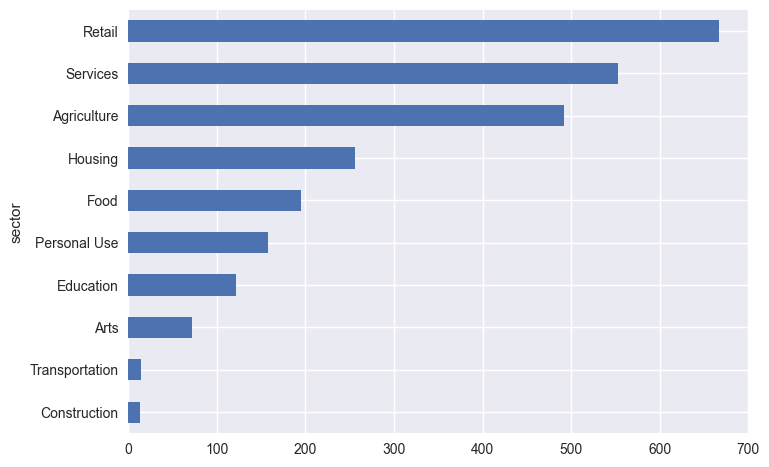

In [50]:
# visualisasi dari hasil agregasi
top_10_sectors.sort_values().plot.barh()

**Insight:** 
- sector Retail paling banyak minjam melalui KIVA

## Question 2️⃣

❓ 2.1. Sektor dengan nilai tengah pinjaman yang paling tinggi?

❓ 2.2. Sektor dengan jumlah pinjaman paling bervariasi?

❓ 2.3. Sektor dengan outlier atas terbesar? Kemudian cari di daerah manakah pinjaman tersebut terjadi

Menggunakan data `kiva_indo` silahkan melihat persebaran `funded_amount` berdasarkan `sector` nya untuk menjawab pertanyaan di atas

> 💡 Hint: Gunakan parameter `column` pada boxplot untuk menentukan kolom numerik apa yang akan dilihat persebarannya!

C:\Users\arkan\AppData\Local\Temp\ipykernel_5640\168554012.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  kiva_indo.plot.box(by='sector', column='funded_amount', rot=45)


funded_amount    Axes(0.125,0.11;0.775x0.77)
dtype: object

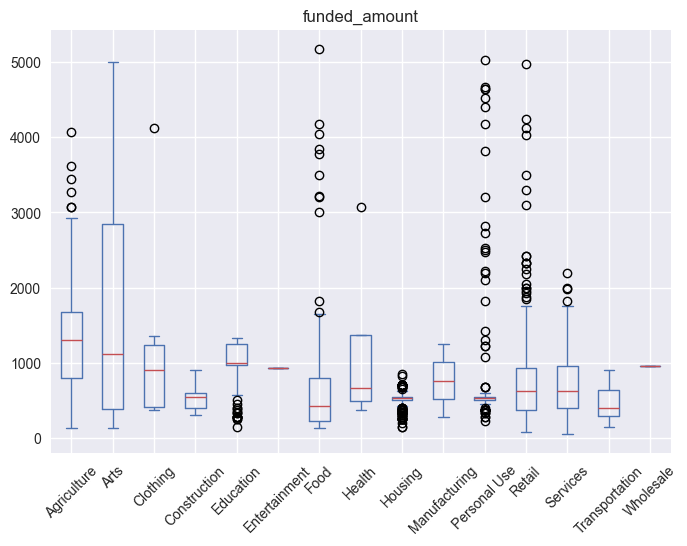

In [51]:
# visualisasi funded amount dan sector
kiva_indo.plot.box(by='sector', column='funded_amount', rot=45)

In [52]:
# Mencari pinjaman dengan pinjaman terbesar
kiva_indo[kiva_indo['funded_amount'] > 5000]

,id,funded_amount,loan_amount,activity,sector,country,region,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval
83446,740103,5175.0,5175.0,Food Production/Sales,Food,Indonesia,CILACAP,253,2014-07-17 06:08:46,2014-08-18 02:46:28,25,150,irregular
220467,889888,5025.0,5025.0,Home Energy,Personal Use,Indonesia,Sumbawa Besar,423,2015-05-22 05:35:58,2015-06-07 13:53:05,24,147,irregular


**Insight:**
- Agriculture merupakan sector yang memiliki funded amount dengan median tertinggi
- Arts merupakan sector yang memiliki variasi funded amount terbesar
- Cilacap merupakan daerah dengan usaha yang memiliki nilai funded amount terbesar

## Question 3️⃣

> ❓ Berdasarkan jawaban nomor satu, berdasarkan 3 sektor dengan frekuensi tertinggi, kita ingin mengetahui pada bulan apa saja masing-masing sektor tersebut memiliki rata-rata pinjaman tertinggi?

> Buatlah **grouped barchart** untuk membandingkan rata-rata nilai `funded_amount` untuk ketiga `sector` dengan frekuensi terbanyak **setiap bulannya**.

- Buatlah kolom baru yang berisikan nama bulan
- Buatlah sebuah objek dataframe bernama `top3_sector` yang berisikan observasi ketiga sector dengan frekuensi pinjaman terbanyak
    > Hint: Gunakan method `.isin()` untuk filter beberapa jenis kategori di kolom yang sama
- Tampilkan nilai rata-rata `funded_amount` untuk setiap bulannya. Simpan tabel agregasi ke objek `top3_agg_month`

In [53]:
kiva_indo.head(2)

,id,funded_amount,loan_amount,activity,sector,country,region,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval
867,654114,1500.0,1500.0,Phone Use Sales,Retail,Indonesia,Bogor Barat,219,2014-01-06 10:02:08,2014-01-17 14:08:07,8,51,bullet
954,654140,825.0,825.0,Utilities,Services,Indonesia,Bogor Barat,219,2014-01-06 10:55:12,2014-01-11 23:24:14,8,26,bullet


In [54]:
# Membuat kolom Month yang berisi nama bulan
kiva_indo['month'] = kiva_indo['funded_time'].dt.month_name()
kiva_indo

,id,funded_amount,loan_amount,activity,sector,country,region,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval,month
867,654114,1500.0,1500.0,Phone Use Sales,Retail,Indonesia,Bogor Barat,219,2014-01-06 10:02:08,2014-01-17 14:08:07,8,51,bullet,January
954,654140,825.0,825.0,Utilities,Services,Indonesia,Bogor Barat,219,2014-01-06 10:55:12,2014-01-11 23:24:14,8,26,bullet,January
1027,654067,1000.0,1000.0,Services,Services,Indonesia,Bogor Barat,219,2014-01-06 08:46:31,2014-01-15 12:26:59,8,34,bullet,January
1042,654102,1500.0,1500.0,Services,Services,Indonesia,NaN,219,2014-01-06 09:42:42,2014-01-06 22:32:09,2,32,bullet,January
1066,654084,825.0,825.0,Phone Use Sales,Retail,Indonesia,Bogor Barat,219,2014-01-06 09:13:39,2014-01-08 17:46:44,8,26,bullet,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322903,1002432,875.0,875.0,Services,Services,Indonesia,Tangerang Selatan,219,2015-12-30 18:11:31,2016-01-28 02:33:10,14,33,bullet,January
322996,1002744,525.0,525.0,Personal Expenses,Personal Use,Indonesia,Tangerang,406,2015-12-31 09:21:36,2015-12-31 21:54:59,37,19,irregular,December
323090,1002645,600.0,600.0,Personal Housing Expenses,Housing,Indonesia,Tangerang,406,2015-12-31 04:44:26,2016-01-05 16:48:40,48,21,irregular,January
323186,1002695,525.0,525.0,Personal Housing Expenses,Housing,Indonesia,Tangerang,406,2015-12-31 08:51:02,2016-01-01 17:14:35,60,13,irregular,January


In [55]:
kiva_indo['sector'].isin(['Retail', 'Services', 'Agriculture'])

867        True
954        True
1027       True
1042       True
1066       True
          ...  
322903     True
322996    False
323090    False
323186    False
323192    False
Name: sector, Length: 2557, dtype: bool

In [59]:
# filter 3 sektor tertinggi
top3_sector = kiva_indo[ kiva_indo['sector'].isin(['Retail', 'Services', 'Agriculture']) ]
top3_sector

,id,funded_amount,loan_amount,activity,sector,country,region,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval,month
867,654114,1500.0,1500.0,Phone Use Sales,Retail,Indonesia,Bogor Barat,219,2014-01-06 10:02:08,2014-01-17 14:08:07,8,51,bullet,January
954,654140,825.0,825.0,Utilities,Services,Indonesia,Bogor Barat,219,2014-01-06 10:55:12,2014-01-11 23:24:14,8,26,bullet,January
1027,654067,1000.0,1000.0,Services,Services,Indonesia,Bogor Barat,219,2014-01-06 08:46:31,2014-01-15 12:26:59,8,34,bullet,January
1042,654102,1500.0,1500.0,Services,Services,Indonesia,NaN,219,2014-01-06 09:42:42,2014-01-06 22:32:09,2,32,bullet,January
1066,654084,825.0,825.0,Phone Use Sales,Retail,Indonesia,Bogor Barat,219,2014-01-06 09:13:39,2014-01-08 17:46:44,8,26,bullet,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322513,1002435,875.0,875.0,Services,Services,Indonesia,Serang,219,2015-12-30 18:19:11,2016-01-22 04:27:49,14,31,bullet,January
322574,1002438,875.0,875.0,Services,Services,Indonesia,Serang,219,2015-12-30 18:24:41,2016-01-27 20:36:20,14,14,bullet,January
322738,1002431,875.0,875.0,Services,Services,Indonesia,Tangerang Selatan,219,2015-12-30 18:06:00,2016-01-27 23:44:47,14,30,bullet,January
322821,1002444,875.0,875.0,Services,Services,Indonesia,Serang,219,2015-12-30 18:45:05,2016-01-27 17:35:47,14,34,bullet,January


In [58]:
top3_sector.pivot_table(
	index='month',
	values='funded_amount',
	columns='sector',
	aggfunc='mean',
	observed=True
)

sector,Agriculture,Retail,Services
month,,,
April,1321.621622,792.916667,641.463415
August,1099.285714,773.571429,788.541667
December,992.410714,572.169811,830.681818
February,1444.531250,717.187500,703.225806
January,1536.290323,852.083333,700.735294
July,1061.904762,514.880952,633.163265
June,1407.236842,879.824561,713.425926
March,1567.073171,678.703704,700.990099
May,1511.250000,788.970588,795.192308


In [60]:
# membuat tabel agregasi
top3_agg_month = top3_sector.groupby(['month', 'sector'], observed=True)['funded_amount'].mean().unstack() # observed = True untuk menghilangkan nilai yang missing
top3_agg_month

sector,Agriculture,Retail,Services
month,,,
April,1321.621622,792.916667,641.463415
August,1099.285714,773.571429,788.541667
December,992.410714,572.169811,830.681818
February,1444.531250,717.187500,703.225806
January,1536.290323,852.083333,700.735294
July,1061.904762,514.880952,633.163265
June,1407.236842,879.824561,713.425926
March,1567.073171,678.703704,700.990099
May,1511.250000,788.970588,795.192308


<Axes: xlabel='month'>

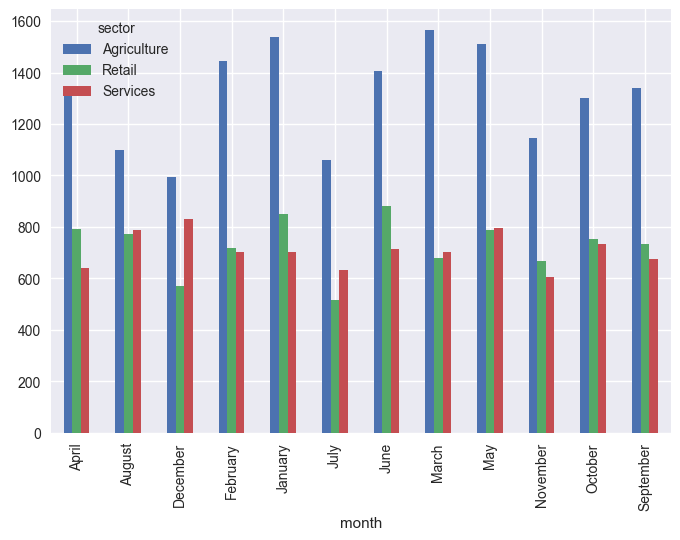

In [61]:
# Membuat visualisasi dari tabel agregasi
top3_agg_month.plot.bar()

<Axes: xlabel='month'>

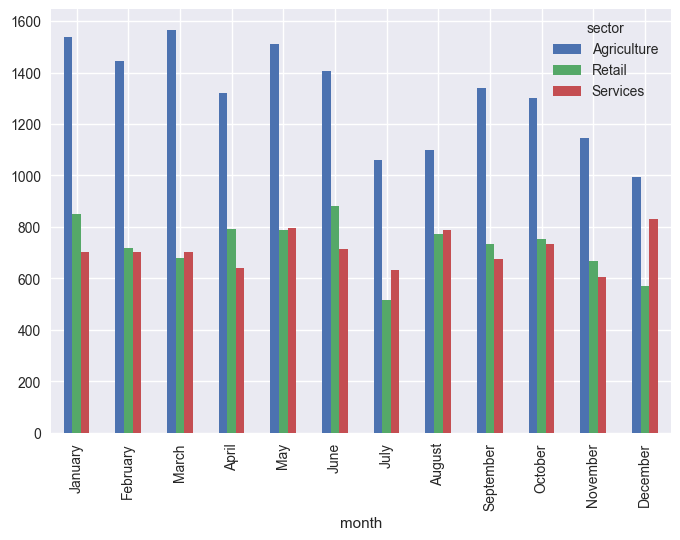

In [38]:
# Improvement visualisasi
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
top3_agg_month = top3_agg_month.reindex(months)
top3_agg_month.plot.bar()

**Insight:**
- Agrikultur paling tinggi pada bulan maret
- Retail paling tinggi pada bulan Juni
- Services paling tinggi pada bulan Desember

## Question 4️⃣

Selamat!!! Sampai di tahap ini Anda dan tim sudah berhasil untuk melakukan analisis data Kiva. Namun, kami paham bahwa Anda dan Tim ingin mengeksplor lebih banyak lagi data Kiva sehingga menghasilkan insight menarik yang dapat digunakan untuk mendukung pengambilan keputusan di perusahaan Kiva. Oleh karena itu, ini waktu yang tepat untuk Anda dan tim menggali insight menarik lainnya dari data `kiva` dan sajikan dalam bentuk visualisasi!

Pilihan visualisasi dapat berupa:
- line plot
- bar plot
- histogram
- box plot
- ataupun yang lainnya

In [62]:
kiva

,id,funded_amount,loan_amount,activity,sector,country,region,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval
0,653051,300.0,300.0,Fruits & Vegetables,Food,Pakistan,Lahore,247,2014-01-01 06:12:39,2014-01-02 10:06:32,12,12,irregular
1,653053,575.0,575.0,Rickshaw,Transportation,Pakistan,Lahore,247,2014-01-01 06:51:08,2014-01-02 09:17:23,11,14,irregular
2,653068,150.0,150.0,Transportation,Transportation,India,Maynaguri,334,2014-01-01 09:58:07,2014-01-01 16:01:36,43,6,bullet
3,653063,200.0,200.0,Embroidery,Arts,Pakistan,Lahore,247,2014-01-01 08:03:11,2014-01-01 13:00:00,11,8,irregular
4,653084,400.0,400.0,Milk Sales,Food,Pakistan,Abdul Hakeem,245,2014-01-01 11:53:19,2014-01-01 19:18:51,14,16,monthly
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323274,1002602,1500.0,1500.0,Personal Housing Expenses,Housing,Cambodia,Kampong Speu,106,2015-12-31 01:57:56,2015-12-31 21:00:58,26,56,monthly
323275,1002761,1500.0,1500.0,Farming,Agriculture,Cambodia,"Kampong Cham province, Ponhea Krek district",204,2015-12-31 10:54:52,2016-01-03 03:48:36,13,54,monthly
323276,1002668,725.0,725.0,Beauty Salon,Services,Pakistan,Lahore,247,2015-12-31 06:18:49,2016-01-27 17:52:55,13,28,monthly
323277,1002832,550.0,550.0,Food Production/Sales,Food,El Salvador,La Unión,199,2015-12-31 15:26:08,2016-01-05 00:28:49,20,21,monthly
